In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: load data
auto_df_raw = pd.read_csv('./data/auto_mpg.csv')
auto_df = auto_df_raw.copy()

# Step 3: set X and y
y = auto_df['mpg'].copy()
X = auto_df.drop('mpg', axis=1).copy()

In [2]:
auto_df.isnull().any().any()

False

In [3]:
auto_df.describe()['mpg']

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

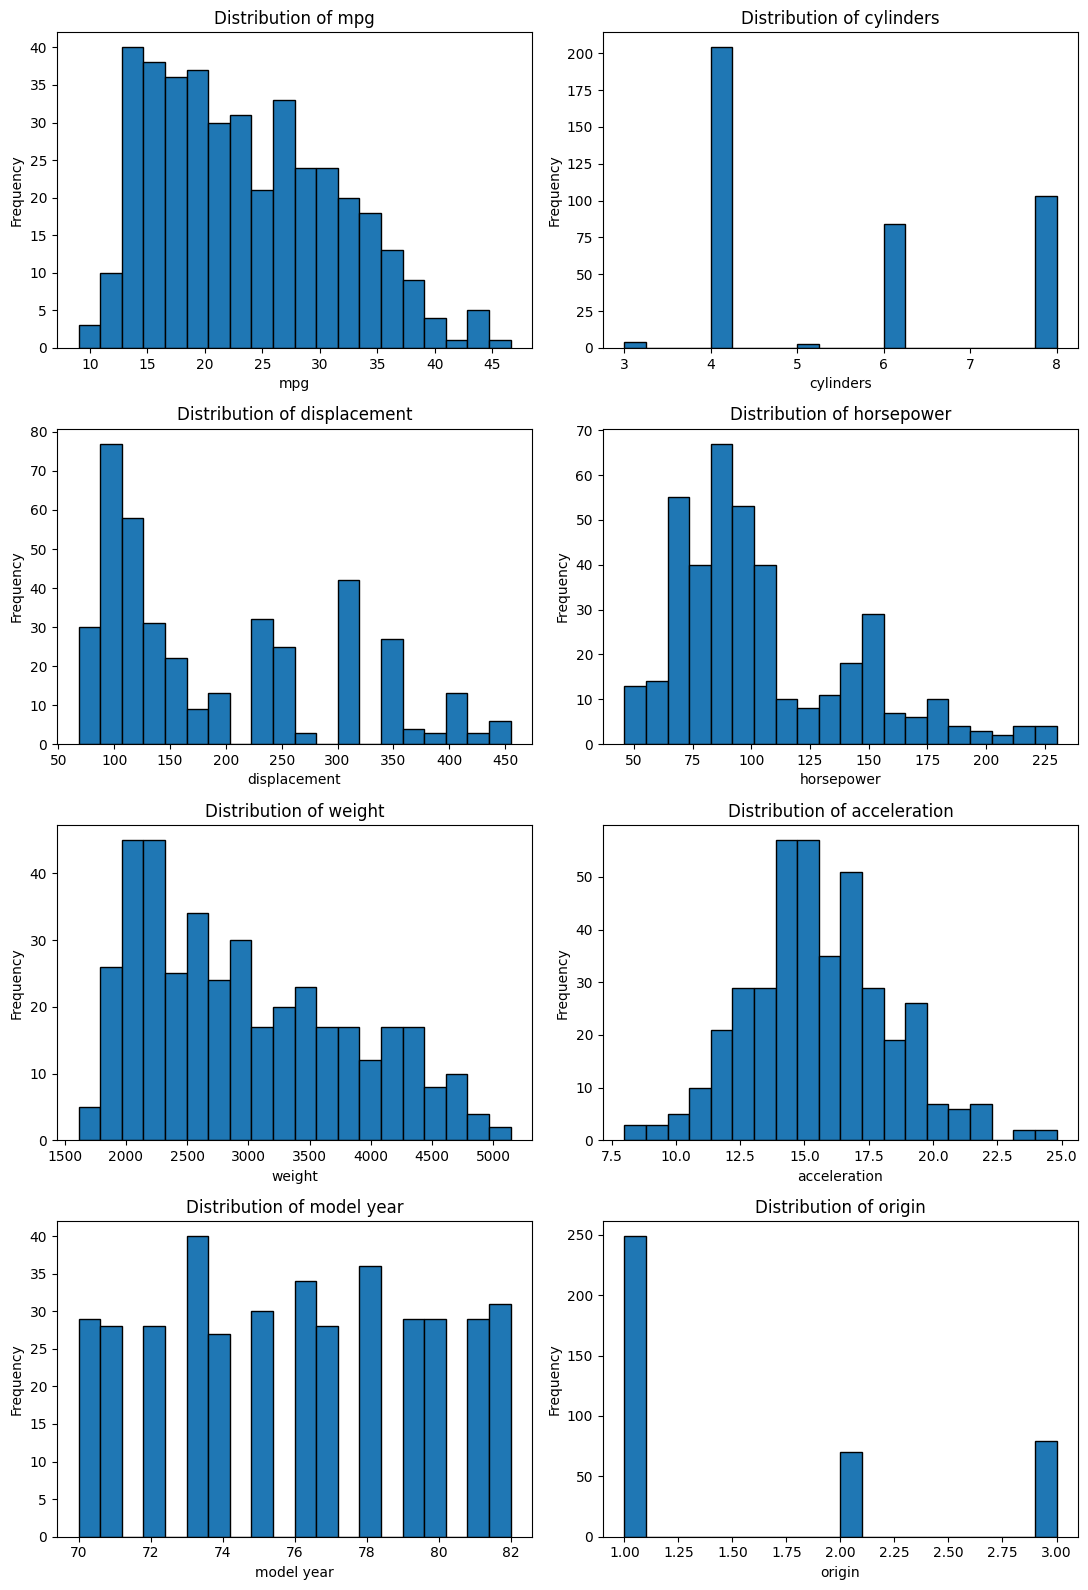

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Example DataFrame
df = auto_df.copy()

# continuous data only:
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for the grid
num_features = len(continuous_columns)
num_cols = 2  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

# Set up the matplotlib figure
plt.figure(figsize=(11, num_rows * 4))  # Adjust height to fit all rows

# Plot histograms for each feature
for i, feature in enumerate(df[continuous_columns]):
    plt.subplot(num_rows, num_cols, i + 1)  # Position of subplot
    plt.hist(df[feature], bins=20, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [5]:
continuous_columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [6]:
def scale(x, maximum, minimum):
    return (x - minimum) / (maximum - minimum)

scaled_raw = auto_df[['displacement', 'horsepower', 'acceleration','weight', 'mpg']].copy()

scaled_df = scaled_raw.apply(lambda row: scale(row, row.max(), row.min()))

scaled_df

,displacement,horsepower,acceleration,weight,mpg
0,0.617571,0.456522,0.238095,0.536150,0.239362
1,0.728682,0.646739,0.208333,0.589736,0.159574
2,0.645995,0.565217,0.178571,0.516870,0.239362
3,0.609819,0.565217,0.238095,0.516019,0.186170
4,0.604651,0.510870,0.148810,0.520556,0.212766
...,...,...,...,...,...
393,0.186047,0.217391,0.452381,0.333711,0.478723
394,0.074935,0.032609,0.988095,0.146583,0.930851
395,0.173127,0.206522,0.214286,0.193365,0.611702
396,0.134367,0.179348,0.630952,0.286929,0.505319


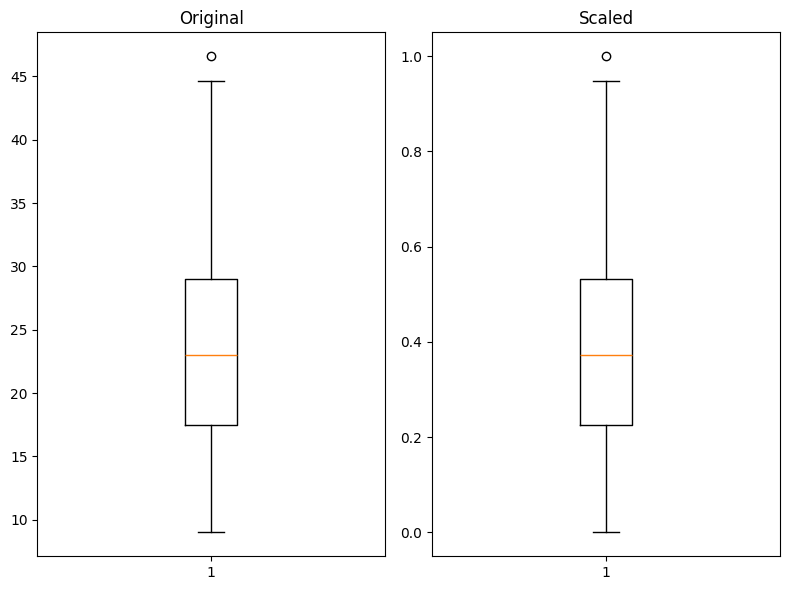

In [7]:
# Plot
plt.figure(figsize=(8, 6))

# Plot box plots for each type
plt.subplot(1,2,1)
plt.boxplot(auto_df['mpg'])
plt.title(f'Original')

plt.subplot(1,2,2)
plt.boxplot(scaled_df['mpg'])
plt.title(f'Scaled')

plt.tight_layout()
plt.show()